In [1]:
import numpy as np
import h5py

from matplotlib import rc
rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

# #                                                                                                                                       
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})                                                                                             
mpl.rcParams['text.usetex'] = False
mpl.rcParams.update({'xtick.labelsize': 18})
mpl.rcParams.update({'ytick.labelsize': 18})
mpl.rcParams.update({'axes.labelsize': 18})
mpl.rcParams.update({'legend.frameon': False})
mpl.rcParams.update({'lines.linewidth': 2})

import matplotlib.pyplot as plt
import mplhep as hep
hep.set_style(hep.style.CMS)
hep.style.use("CMS")

/tmp/ipykernel_680614/2695042274.py:26: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [2]:
x = h5py.File("../eval/phys_weights_n_40/bootstrap_n_1/22062023_07:54:41_gpu_2_1.h5","r")
bin_edges = np.array(x['bins'])
midpoints = (bin_edges[1:] + bin_edges[:-1]) / 2
logmid = np.log(midpoints)
counts = np.array(x['counts'])

In [3]:
data = np.load("/global/cfs/cdirs/m3246/bnachman/LEP/aleph/processed/data_vals_reco.npy")
dpass = np.load("/global/cfs/cdirs/m3246/bnachman/LEP/aleph/processed/data_pass_reco.npy")

Text(1, 0, '$\\log\\left(1-T\\right)$')

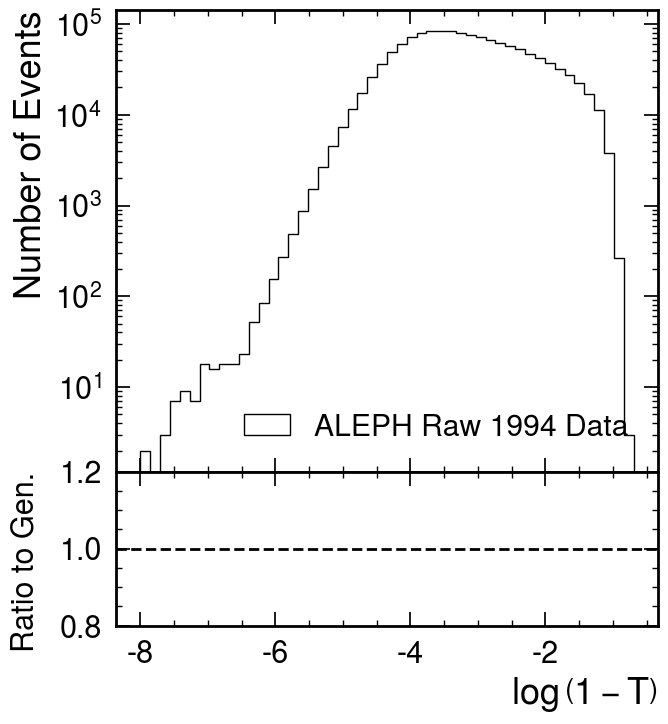

In [4]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(7,8))
plt.subplots_adjust(hspace=0)

bins =  np.linspace(-8, np.log(0.5), 50+1)

# plot the "data" histogram of the observable
ax1.hist(np.log(1-data[dpass]), bins=bins, color='black', label='ALEPH Raw 1994 Data', histtype = 'step')

# unfolded distribution
# ax1.errorbar(logmid, counts, color='green', label='ALEPH E.P.J. C (2004)', xerr=0, yerr=0)
ax1.legend()

# Bottom subplot (ratio plot)
ax2.axhline(y=1, color='black', linestyle='--')  # Adding a horizontal line at y=1 for reference

# tick params
tick_params_major = {"which"     : "major",
                     "length"    : 10,
                     "width"     : 1.25,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 22,
                     "pad"       : 10}
tick_params_minor = {"which"     : "minor",
                     "length"    : 4,
                     "width"     : 1,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 18}
ax1.tick_params(**tick_params_major)
ax1.tick_params(**tick_params_minor)
ax2.tick_params(**tick_params_major)
ax2.tick_params(**tick_params_minor)

# set limits
# ax1.set_ylim(0.2*10**-5, 10**0)
# ax2.set_xlim(-10,0)
ax2.set_ylim(0.8,1.2)

# log scale
ax1.set_yscale("log")

# axis labels
ax1.set_ylabel("Number of Events") #r'Number of $\tilde{\eta}$ decays/Event')
ax2.set_ylabel("Ratio to Gen.", fontsize=22, labelpad=14)
ax2.set_xlabel(r'$\log\left(1-T\right)$')

# legend
# handles, labels = ax.get_legend_handles_labels()
# new_handles = [Line2D([], [], linestyle='-', marker='o', c=h.get_edgecolor()) for h in handles]
# ax.legend(new_handles,
#           labels,
#           title="",
#           title_fontsize="13",
#           ncol=1,
#           framealpha=0.0,
#           prop={'size': 17},
#           bbox_to_anchor=(0.5, 0.4, 0.45, 0.5), #(0.54, 0.45, 0.45, 0.5)
#           handlelength=1.25)

# add text
# left, top, t = 0.07, 0.94, 0.06
# stamps = [
#     r"higgs portal, $pp \rightarrow h \rightarrow q_{d}q_{d} \; (q_{d} \rightarrow (dark) \; hadrons)$",
#     "arxiv:2103.01238",
#     r"$\mathit{m_{\tilde{\omega}}} = \mathit{m_{\tilde{\eta}}}$",
#     r"$c\tau = 30\; mm \times \left(\frac{5 \; GeV}{\mathit{m_{\tilde{\eta}}}}\right)^{7}$", #  # 5 \; GeV / \mathit{m_{\tilde{\eta}}}
#     r"$L_{xy} < 1000\; mm$",
#     r"$\mathrm{p_{T}}$ > 5 GeV, |$\eta$|<2.4",
# ]
# for i, stamp in enumerate(stamps):
#     ax1.text(left, top - i*t, stamp, fontsize=14, ha='left', va='top', transform=ax1.transAxes)

# save
# plt.savefig("number_of_decays.pdf", bbox_inches="tight")